In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

In [2]:
df = pd.read_csv("diabetes.csv")
print(df.head())    

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


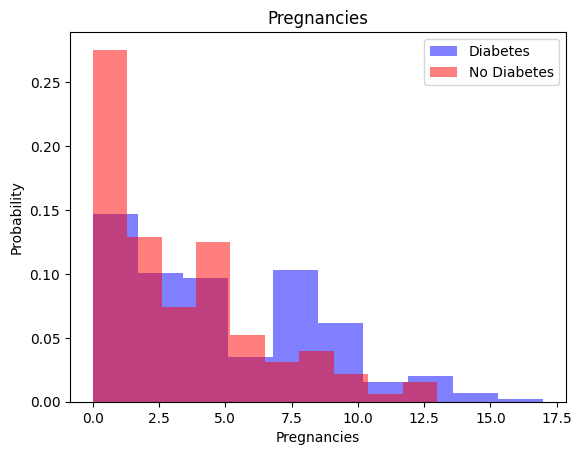

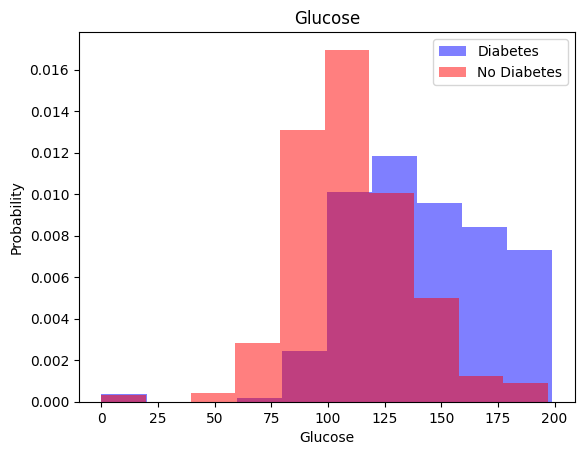

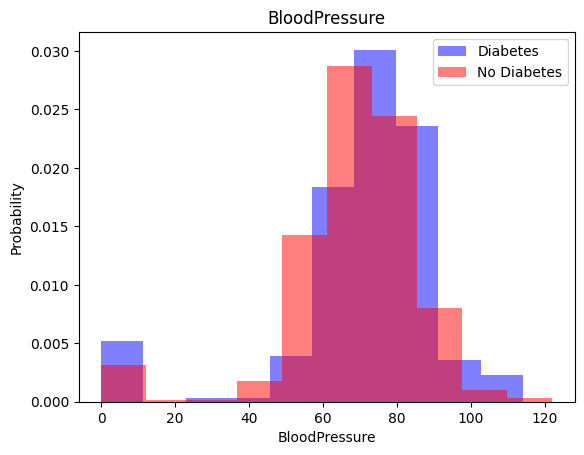

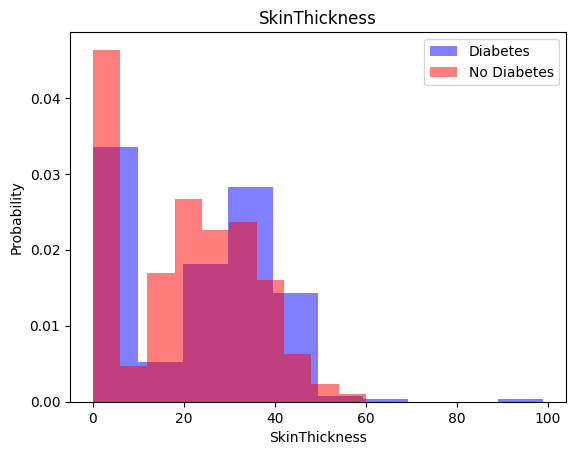

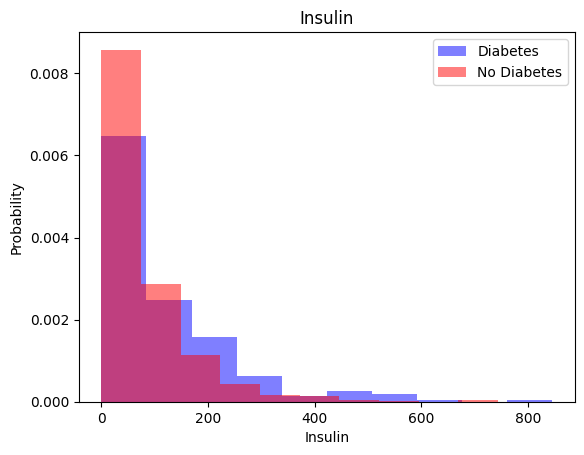

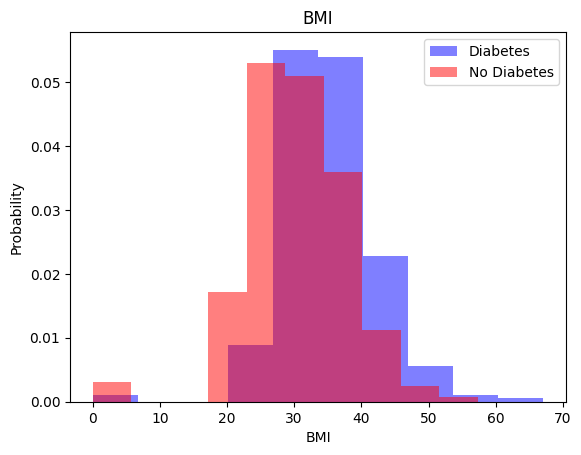

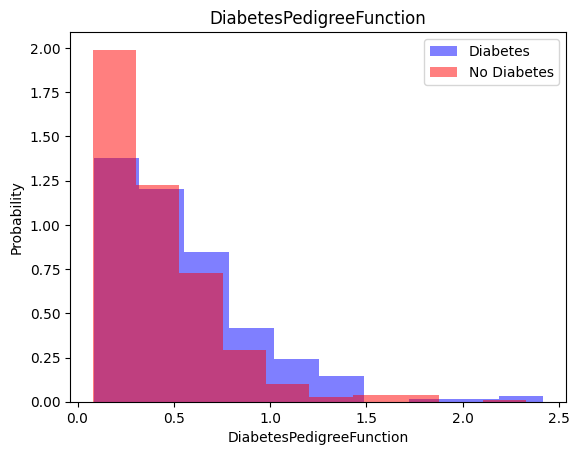

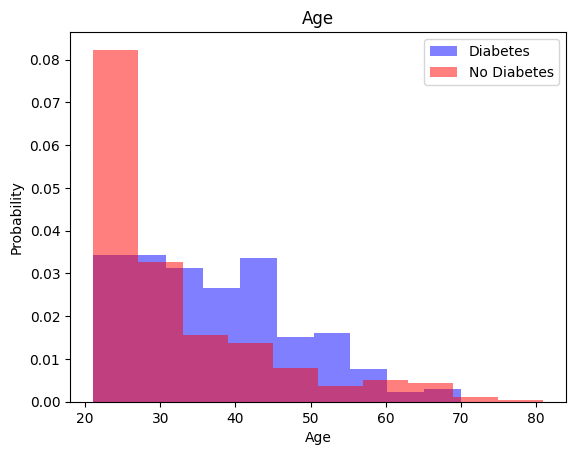

In [12]:
# plotting the data


for i in range(len(df.columns[:-1])): # until the last column
    label = df.columns[i] # column labels
    plt.hist(df[df['Outcome']==1][label], color="blue", label="Diabetes", alpha=0.5, density=True) # positive
    plt.hist(df[df['Outcome']==0][label], color="red", label="No Diabetes", alpha=0.5, density=True) # negative
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.title(label)
    plt.legend()
    plt.show()


In [4]:
x_values = df[df.columns[:-1]].values # matrix
y_values = df[df.columns[-1]].values # output column

# scale the quantities (normalize the data)
scaler = StandardScaler()
x = scaler.fit_transform(x_values)

# make dataset balanced in terms of outcomes
over = RandomOverSampler()
x, y = over.fit_resample(x, y_values)

# 60% of the dataset for training, 20% for testing, 20% for validation
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0) # training
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0) # validation

In [9]:
# build model (layers, activation functions)
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # used for binary classification
])

# compile model (optimizer, loss function, metrics)
model.compile (
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# train the model
model.fit(
    x_train, 
    y_train, 
    batch_size=2, 
    epochs=10,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.7017 - val_loss: 0.5279 - val_accuracy: 0.7400
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7617 - val_loss: 0.4883 - val_accuracy: 0.7450
Epoch 3/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7433 - val_loss: 0.4844 - val_accuracy: 0.7450
Epoch 4/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7683 - val_loss: 0.4839 - val_accuracy: 0.7700
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7983 - val_loss: 0.4342 - val_accuracy: 0.7950
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8017 - val_loss: 0.4530 - val_accuracy: 0.7750
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8117 - val_loss: 0.4287 - val_accuracy: 0.8100
Epoch 

In [11]:
test = []

with open('test.csv') as file:
    output = [float(s) for line in file.readlines() for s in line[:-1].split(',')]
    test.append(output)

print(test)

test = np.array(test).reshape(-1, 1)
normalized_array = scaler.fit_transform(test)

predicted = model.predict(np.array([normalized_array]))

print(predicted)

if(predicted > 0.5):
    print("Diabetes")
else:
    print("No diabetes")

[[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 3.0]]
1/1 [==============================] - 0s 15ms/step
[[0.9761494]]
Diabetes
